## References

In [69]:
# https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
# https://radimrehurek.com/gensim/models/ldamodel.html

## Prepare Notebook

In [95]:
# import packages
from gensim import models
import pandas as pd
import pickle
import logging
import os
from gensim import corpora, models
import numpy as np
import matplotlib.pyplot as plt

In [71]:
# log events
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Load Test Documents

In [72]:
# load district documents for first objective
with open('tokenized_documents_district_pooling.p', 'rb') as fp:
    district_pooling_docs = pickle.load(fp)

# load month documents for second objective
with open('tokenized_documents_month_pooling.p', 'rb') as fp:
    month_pooling_docs = pickle.load(fp)

# load month and district documents for second objective
with open('tokenized_documents_district_per_month_pooling.p', 'rb') as fp:
    district_per_month_pooling_docs = pickle.load(fp)

## Load Model and Dictionary

In [73]:
# load model
lda_model =  models.LdaModel.load('lda.model')

# load dictionary
if (os.path.exists("tourism_hashtag_pooling.dict")):
   dictionary = corpora.Dictionary.load('tourism_hashtag_pooling.dict')
   print("Hashtag pooling dictionary loaded!")
else:
   print("Please train LDA model first!")

2018-09-26 08:40:33,862 : INFO : loading LdaModel object from lda.model
2018-09-26 08:40:33,866 : INFO : loading expElogbeta from lda.model.expElogbeta.npy with mmap=None
2018-09-26 08:40:33,870 : INFO : setting ignored attribute dispatcher to None
2018-09-26 08:40:33,870 : INFO : setting ignored attribute id2word to None
2018-09-26 08:40:33,874 : INFO : setting ignored attribute state to None
2018-09-26 08:40:33,874 : INFO : loaded lda.model
2018-09-26 08:40:33,878 : INFO : loading LdaState object from lda.model.state
2018-09-26 08:40:33,882 : INFO : loaded lda.model.state
2018-09-26 08:40:33,894 : INFO : loading Dictionary object from tourism_hashtag_pooling.dict
2018-09-26 08:40:33,902 : INFO : loaded tourism_hashtag_pooling.dict


Hashtag pooling dictionary loaded!


## Running Model on Test Documents

In [74]:
# apply model to district pooled documents and get topic probability distributions
district_bow_list = [dictionary.doc2bow(text) for text in district_pooling_docs]
# district_1 = district_bow_list[0]
district_topic_list = []

for index in range(len(district_bow_list)):
    district_bow = district_bow_list[index]
    topic_vector = lda_model[district_bow] # get topic probability distribution for a document
    district_topic_list.append(topic_vector)

In [75]:
# display district topic list
district_topic_list

[[(0, 0.076546676),
  (1, 0.14248215),
  (2, 0.072030298),
  (3, 0.11498991),
  (4, 0.22621693),
  (5, 0.028519053),
  (6, 0.2195864),
  (7, 0.11962861)],
 [(0, 0.036172304),
  (1, 0.14472471),
  (2, 0.1251428),
  (3, 0.090867169),
  (4, 0.23936342),
  (5, 0.065774553),
  (6, 0.23838015),
  (7, 0.059574936)],
 [(0, 0.053951729),
  (1, 0.36222401),
  (2, 0.080988258),
  (3, 0.029328113),
  (4, 0.17636307),
  (5, 0.083754249),
  (6, 0.11593124),
  (7, 0.097459316)],
 [(0, 0.059777047),
  (1, 0.17819059),
  (2, 0.12977499),
  (3, 0.1042411),
  (4, 0.11915775),
  (5, 0.11625889),
  (6, 0.11243489),
  (7, 0.18016471)],
 [(0, 0.015616706),
  (1, 0.1901648),
  (2, 0.25489697),
  (3, 0.065254577),
  (4, 0.15272309),
  (6, 0.2445455),
  (7, 0.076620042)],
 [(0, 0.027071962),
  (1, 0.082043305),
  (2, 0.041410301),
  (3, 0.021568894),
  (4, 0.037068184),
  (5, 0.035378076),
  (6, 0.72950888),
  (7, 0.025950447)],
 [(0, 0.088502645),
  (1, 0.14019118),
  (2, 0.10232271),
  (3, 0.076250561),
  (4,

## Extract for Each Topic the Scores of the Districts

In [76]:
topic0 = []
topic1 = []
topic2 = []
topic3 = []
topic4 = []
topic5 = []
topic6 = []
topic7 = []

for district in range(len(district_topic_list)):
    district_dict = dict(district_topic_list[district])
    
    if 0 in district_dict.keys():
        topic0.append(district_dict[0])
    else:
        topic0.append(0)
    
    if 1 in district_dict.keys():
        topic1.append(district_dict[1])
    else:
        topic1.append(0)
    
    if 2 in district_dict.keys():
        topic2.append(district_dict[2])
    else:
        topic2.append(0)
        
    if 3 in district_dict.keys():
        topic3.append(district_dict[3])
    else:
        topic3.append(0)
        
    if 4 in district_dict.keys():
        topic4.append(district_dict[4])
    else:
        topic4.append(0)
        
    if 5 in district_dict.keys():
        topic5.append(district_dict[5])
    else:
        topic5.append(0)
    
    if 6 in district_dict.keys():
        topic6.append(district_dict[6])
    else:
        topic6.append(0)
        
    if 7 in district_dict.keys():
        topic7.append(district_dict[7])
    else:
        topic7.append(0)

In [77]:
# check topic 0 to see whether the output looks as desired
topic0

[0.076546676,
 0.036172304,
 0.053951729,
 0.059777047,
 0.015616706,
 0.027071962,
 0.088502645,
 0.076501504,
 0.13745691,
 0.18532138,
 0.041544177,
 0.088191263,
 0.14565958,
 0.062451757,
 0.090103723,
 0.034305144,
 0.14549321,
 0.042562924,
 0.092890769,
 0.019738793,
 0.049469795,
 0.098415487,
 0.056988705,
 0.040896654,
 0.065860711,
 0.063268013,
 0.082245111,
 0.036084134,
 0.13037957,
 0.074609607,
 0.087715767,
 0.018619172,
 0.024117475,
 0,
 0.29768673,
 0.099817015,
 0.080153413,
 0.12377448,
 0.048663471,
 0.12839335,
 0.039739758,
 0.05092461,
 0.060334433,
 0.19064277,
 0,
 0.0222305,
 0.037310403,
 0,
 0,
 0.032726076,
 0.16029379,
 0.093033463,
 0.12807548,
 0.024117477,
 0.081719458,
 0.082787395,
 0.049307525,
 0.018022293,
 0,
 0,
 0.17063749,
 0.036177535,
 0.046114102,
 0.10834689,
 0.036159687,
 0.032978635,
 0.036905479,
 0.049902774,
 0.15527661,
 0]

In [109]:
# define function to plot a graph to compare districts for a given topic
def district_bar_graph(districts, indices):
    """
    Function to plot district bar graph.
    
    districts: list with topic scores for each district
    indices: list of district number
    """
    assert len(districts) == len(indices)
    n = len(districts)
    x = np.arange(n)
    plt.figure(figsize=(20,7))
    plt.bar(x, districts, width=0.5, tick_label=indices, align='center')
    plt.xlabel('District')
    plt.ylabel('Topic Score')

## Topic 0: Fitness & Sports

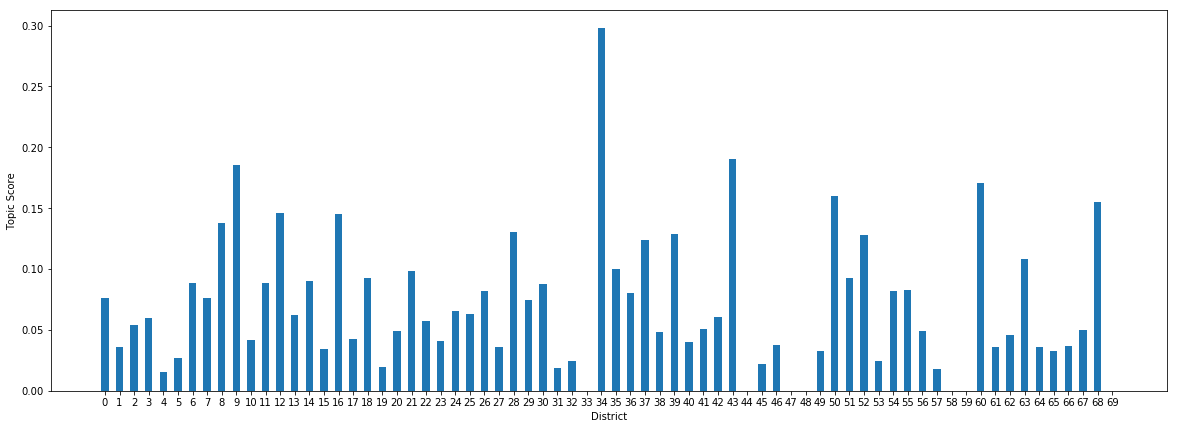

In [110]:
# plot topic scores
district_bar_graph(topic0,
                   list(range(len(topic0))))
plt.show()

## Topic 1: Summer, Sun, Beach

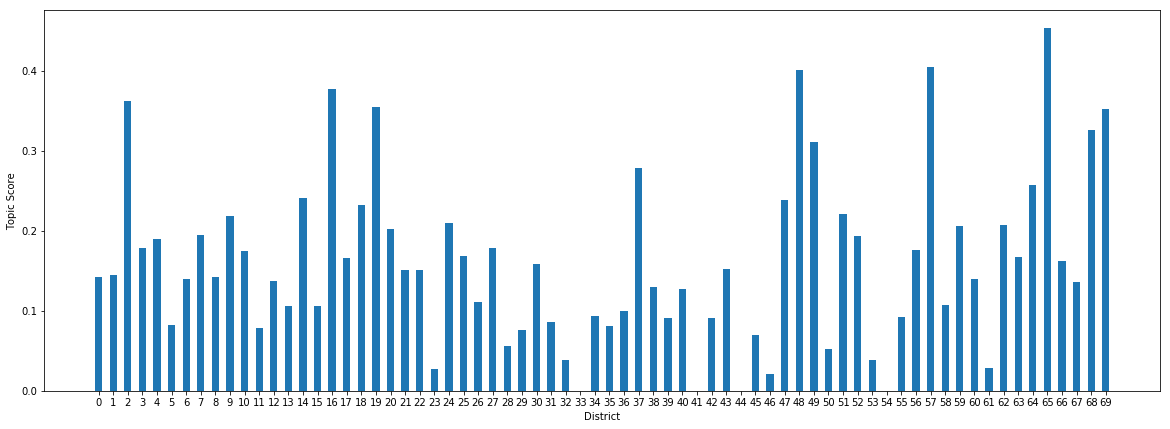

In [111]:
# plot topic scores
district_bar_graph(topic1,
                   list(range(len(topic1))))
plt.show()

## Topic 2: Travel

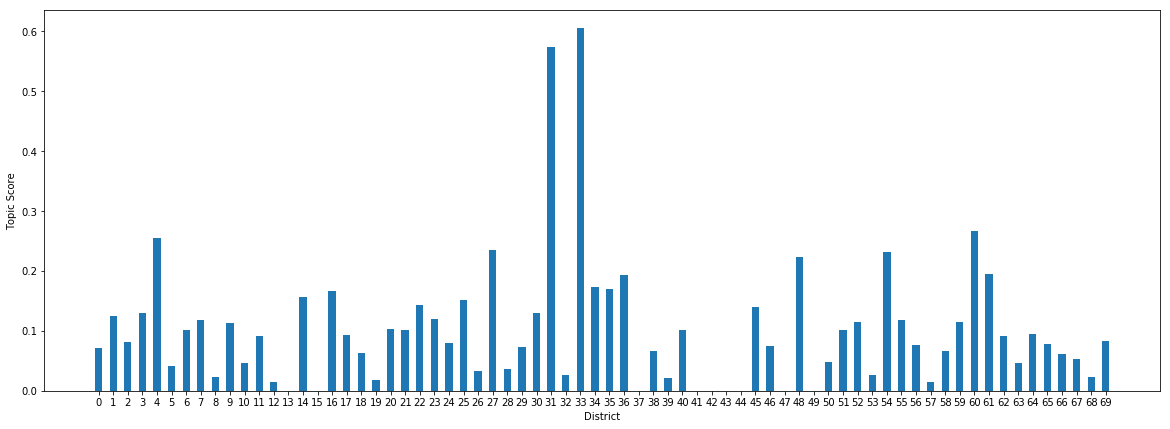

In [112]:
# plot topic scores
district_bar_graph(topic2,
                   list(range(len(topic2))))
plt.show()

## Topic 3: Streetart & Urban Life

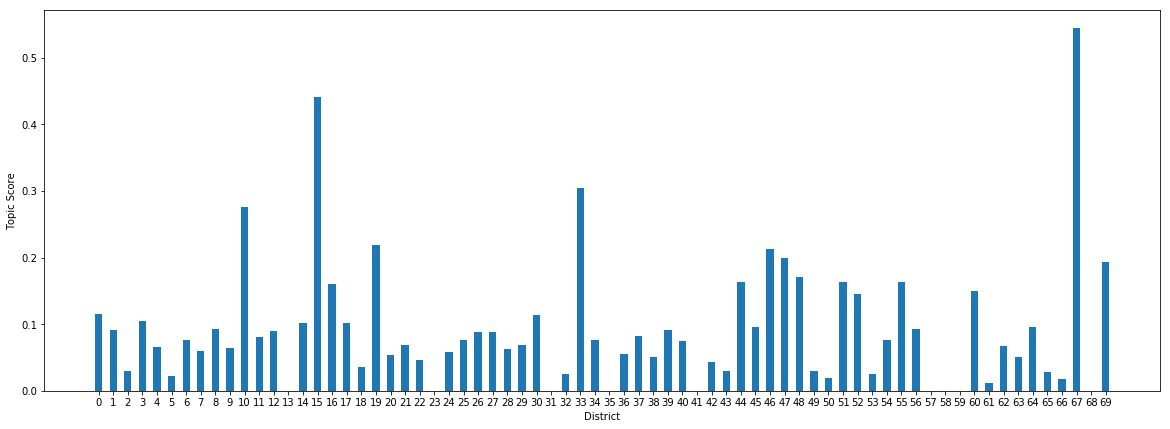

In [113]:
# plot topic scores
district_bar_graph(topic3,
                   list(range(len(topic3))))
plt.show()

## Topic 4: Art

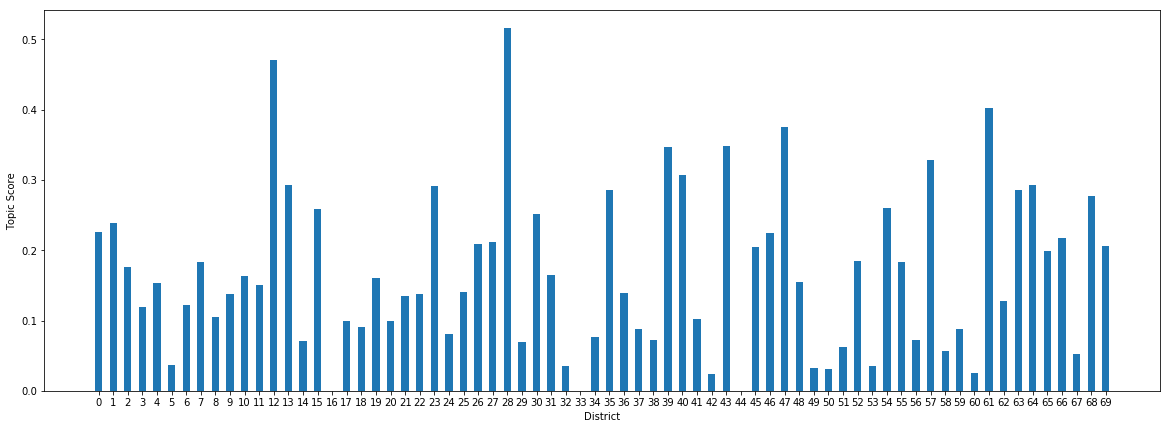

In [114]:
# plot topic scores
district_bar_graph(topic4,
                   list(range(len(topic4))))
plt.show()

## Topic 5: Lifestyle & Other

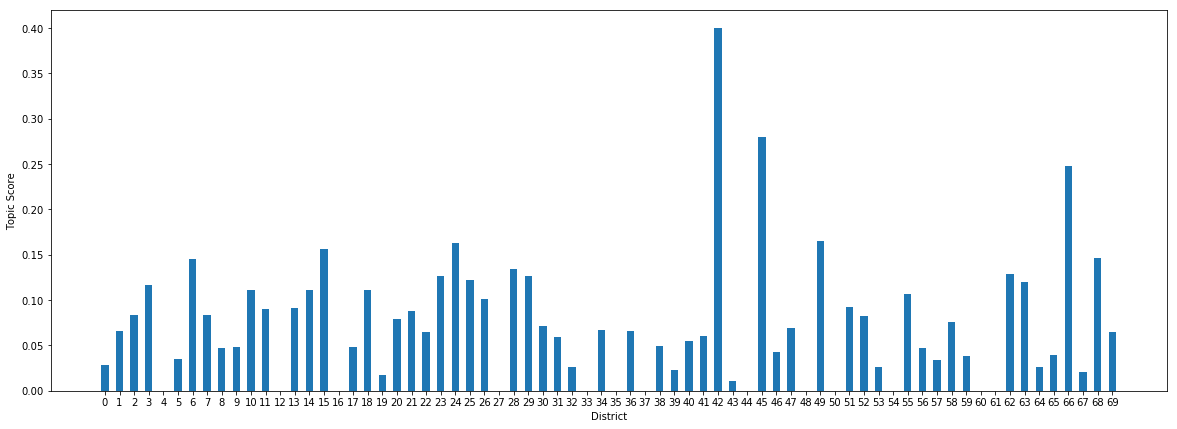

In [115]:
# plot topic scores
district_bar_graph(topic5,
                   list(range(len(topic5))))
plt.show()

## Topic 6: Sightseeing

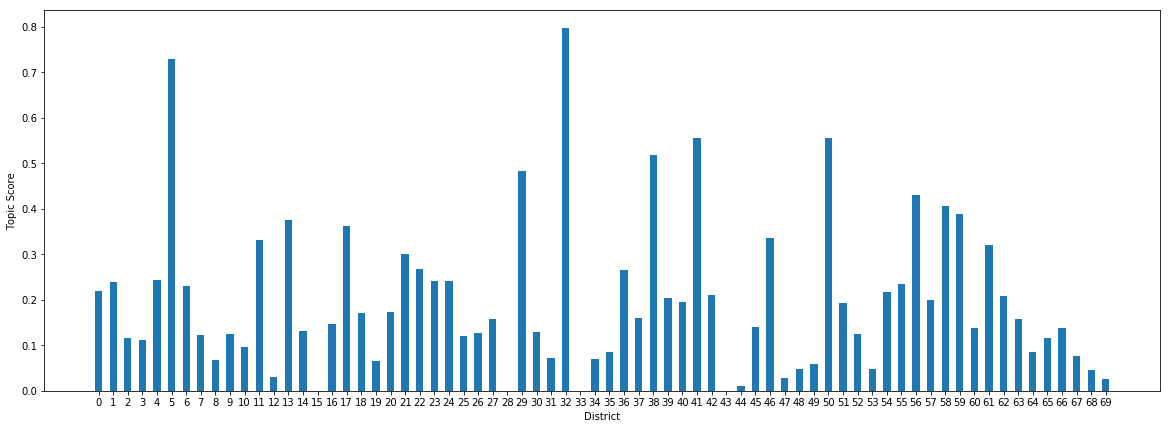

In [116]:
# plot topic scores
district_bar_graph(topic6,
                   list(range(len(topic6))))
plt.show()

## Topic 7: Gastronomy

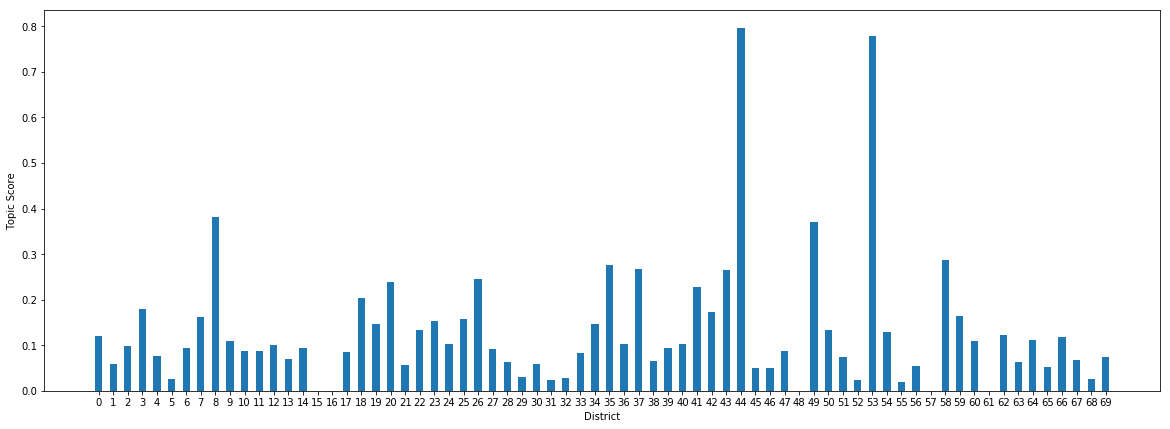

In [117]:
# plot topic scores
district_bar_graph(topic7,
                   list(range(len(topic7))))
plt.show()

In [118]:
# define function to apply the model to unseen documents (similar procedure to above where it was applied to the district docs)
def run_lda_on_test_doc(docs):
    bow_list = [dictionary.doc2bow(text) for text in docs]
    topic_list = []
    
    for index in range(len(bow_list)):
        bow = bow_list[index]
        topic_vector = lda_model[bow]
        topic_list.append(topic_vector)
        
    return topic_list

In [119]:
topics_month = run_lda_on_test_doc(month_pooling_docs)
topics_district_per_month = run_lda_on_test_doc(district_per_month_pooling_docs)